In [10]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import math
import cv2
from copy import deepcopy
import random
from PIL import Image

In [11]:
global visited_list
global C_list
global dataset
#灰點去除
#存入整列
def img_format(img_path, img_size=64):
    img = plt.imread(img_path)
    out_img = []
    out_label = []
    for i in range(len(img)):
        tmp = []
        for j in range(len(img[i])):
            if(int(img[i][j][0]) > 127):
                tmp.append([255, 255, 255])
            else:
                tmp.append([0, 0, 0])
                out_label.append([i, j])
        out_img.append(tmp)            
    return out_img,out_label

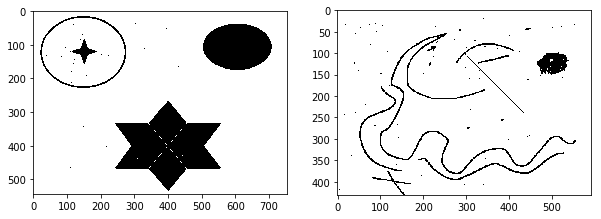

In [12]:
out_img1,out_label1=img_format("Demo1.bmp")
out_img2,out_label2=img_format("Demo2.bmp")
f, a = plt.subplots(1, 2, figsize=(10, 4))
a[0].imshow(out_img1)
a[1].imshow(out_img2)

In [13]:
color=[[255,0,0],[0,255,0],[0,0,255],[255,255,0],[0,255,255],[255,0,255],\
       [0,127,127],[127,0,127],[127,127,0],[0,127,127],\
      [127,0,127],[0,127,127]]
for i in range(800):
    r=random.randint(0,255)
    g=random.randint(0,255)
    b=random.randint(0,255)
    color.append([r,g,b])

In [14]:
def draw(clabel, out_label, img):
    out_img=deepcopy(img)
    for i in range(len(clabel)):
        x, y = out_label[i]
        if(clabel[i] == -1):
            out_img[x][y]=[255, 255, 255]
        else:
            out_img[x][y]=color[clabel[i]]
    return out_img

In [6]:
def dist(a, b):
    return math.pow(math.pow(a[0] - b[0], 2)+math.pow(a[1] - b[1], 2), 0.5)

In [7]:
def My_DBSCAN(out_label, eps, MinPts):
    global visited_list
    global C_list
    global dataset
    dataset = out_label
    visited_list = list(np.zeros(len(dataset)))
    C_list = []
    dic = {}
    for i in range(len(dataset)):
        if (visited_list[i] == 1):
            pass
        else:
            c = 0
            for j in range(len(dataset)):
                if(visited_list[j] == 0 and eps >= dist(dataset[i], dataset[j])):
                    c = c + 1
            if(c >= MinPts):
                visited_list[i] = 1
                dic[i] = list()
                dic[i].append(i)
                find_all_point(i, eps, MinPts)
                dic[i].extend(C_list)
                C_list=[]
    out_list = list(np.full(len(dataset), -1))
    for i in range(len(dic.keys())):
        for j in dic[list(dic.keys())[i]]:
            out_list[j]=i
    return out_list

In [8]:
def find_all_point(i,eps, MinPts):
    global visited_list
    global C_list
    global dataset
    i_list = []
    visited_list[i] = 1
    for j in range(len(dataset)):
        point_eps = dist(dataset[i], dataset[j])
        if(point_eps <= eps):
            i_list.append(j)
    if(len(i_list) >= MinPts):
        for i in range(len(visited_list)):
            if(i in i_list and visited_list[i] == 1):
                i_list.remove(i)
        C_list.extend(i_list)
        for k in i_list:
            find_all_point(k,eps, MinPts)

1_1_5_共計4群.bmp
1_1_7_共計-1群.bmp
1_3_5_共計3群.bmp
1_5_35_共計3群.bmp
2_1_5_共計58群.bmp
2_1_7_共計-1群.bmp
2_3_5_共計52群.bmp
2_5_35_共計36群.bmp


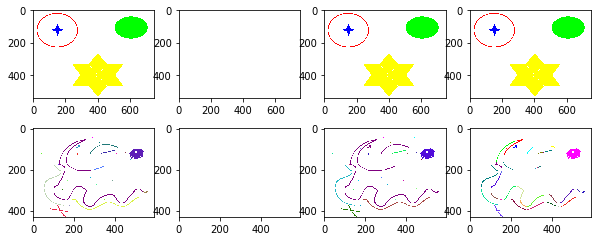

In [52]:
clustering11=My_DBSCAN(out_label1, 1, 5)
clustering12=My_DBSCAN(out_label1, 1, 7)
clustering13=My_DBSCAN(out_label1, 3, 5)
clustering14=My_DBSCAN(out_label1, 5, 35)
clustering21=My_DBSCAN(out_label2, 1, 5)
clustering22=My_DBSCAN(out_label2, 1, 7)
clustering23=My_DBSCAN(out_label2, 3, 5)
clustering24=My_DBSCAN(out_label2, 5, 35)
f, a = plt.subplots(2, 4, figsize=(10, 4))
a[0][0].imshow(draw(clustering11, out_label1, out_img1))
im=Image.fromarray(np.asarray(draw(clustering11, out_label1, out_img1)).astype(np.uint8))
file_name = "1_1_5_共計" + str(max(clustering11)) + "群.bmp"
im.save(file_name)
print(file_name)
a[0][1].imshow(draw(clustering12, out_label1, out_img1))
im=Image.fromarray(np.asarray(draw(clustering12, out_label1, out_img1)).astype(np.uint8))
file_name = "1_1_7_共計" + str(max(clustering12)) + "群.bmp"
im.save(file_name)
print(file_name)
a[0][2].imshow(draw(clustering13, out_label1, out_img1))
im=Image.fromarray(np.asarray(draw(clustering13, out_label1, out_img1)).astype(np.uint8))
file_name = "1_3_5_共計" + str(max(clustering13)) + "群.bmp"
im.save(file_name)
print(file_name)
a[0][3].imshow(draw(clustering14, out_label1, out_img1))
im=Image.fromarray(np.asarray(draw(clustering14, out_label1, out_img1)).astype(np.uint8))
file_name = "1_5_35_共計" + str(max(clustering14)) + "群.bmp"
im.save(file_name)
print(file_name)
a[1][0].imshow(draw(clustering21, out_label2, out_img2))
im=Image.fromarray(np.asarray(draw(clustering21, out_label2, out_img2)).astype(np.uint8))
file_name = "2_1_5_共計" + str(max(clustering21)) + "群.bmp"
im.save(file_name)
print(file_name)
a[1][1].imshow(draw(clustering22, out_label2, out_img2))
im=Image.fromarray(np.asarray(draw(clustering22, out_label2, out_img2)).astype(np.uint8))
file_name = "2_1_7_共計" + str(max(clustering22)) + "群.bmp"
im.save(file_name)
print(file_name)
a[1][2].imshow(draw(clustering23, out_label2, out_img2))
im=Image.fromarray(np.asarray(draw(clustering23, out_label2, out_img2)).astype(np.uint8))
file_name = "2_3_5_共計" + str(max(clustering23)) + "群.bmp"
im.save(file_name)
print(file_name)
a[1][3].imshow(draw(clustering24, out_label2, out_img2))
im=Image.fromarray(np.asarray(draw(clustering24, out_label2, out_img2)).astype(np.uint8))
file_name = "2_5_35_共計" + str(max(clustering24)) + "群.bmp"
im.save(file_name)
print(file_name)
plt.savefig("123.jpg")

In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
X = np.array([[1, 2], [2, 2], [2, 3],\
              [8, 7], [8, 8], [25, 80]])
clustering = DBSCAN(eps=3, min_samples=2).fit(X)
clustering.labels_

array([ 0,  0,  0,  1,  1, -1], dtype=int64)